# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### Градиент функции потерь MSE:
$$
    Q'(w) = \dfrac{2}{\ell} \left(X \right)^T \left( y - Xw \right)
$$
 ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [ ]:
import numpy as np

class BaseDescent:
    def __init__(self):
        # В конструкторе можно инициализировать параметры, если нужно.
        pass

    def calc_loss(self, X, y, w):
        """
        Функция для вычисления потерь MSE (Mean Squared Error).

        :param X: Матрица признаков (размерность N x d)
        :param y: Вектор истинных значений (размерность N x 1)
        :param w: Вектор весов (размерность d x 1)
        :return: Значение функции потерь MSE
        """
        # Прогнозируемые значения
        y_pred = self.predict(X, w)

        # Вычисляем ошибку
        error = y - y_pred

        # Вычисляем MSE
        loss = (1 / len(y)) * np.dot(error.T, error)

        return loss

    def predict(self, X, w):
        """
        Функция для предсказания значений y для заданных входных данных X.

        :param X: Матрица признаков (размерность N x d)
        :param w: Вектор весов (размерность d x 1)
        :return: Вектор предсказанных значений y_pred (размерность N x 1)
        """
        # Прогнозируемые значения
        y_pred = np.dot(X, w)

        return y_pred


### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [ ]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        # TODO: implement loss calculation function
        # Получаем предсказания
        y_pred = self.predict(x)

        # Рассчитываем ошибку (разницу между истинными значениями и предсказанными)
        error = y - y_pred

        # Вычисляем MSE
        mse = np.mean(np.square(error))

        return mse
        raise NotImplementedError('BaseDescent calc_loss function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        # TODO: implement prediction function
        # Линейная регрессия: y_pred = Xw
        y_pred = np.dot(x, self.w)

        return y_pred
        raise NotImplementedError('BaseDescent predict function not implemented')


class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights with respect to gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        # Обновляем веса по формуле w_{k+1} = w_k - eta * gradient
        weight_diff = self.learning_rate * gradient
        self.w -= weight_diff

        return weight_diff
        raise NotImplementedError('VanillaGradientDescent update_weights function not implemented')

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        # Рассчитываем предсказания
        y_pred = self.predict(x)

        # Вычисляем ошибку (разницу между истинными значениями и предсказанными)
        error = y - y_pred

        # Вычисляем градиент: -2/N * X^T * error
        gradient = -2 / x.shape[0] * np.dot(x.T, error)

        return gradient
        raise NotImplementedError('VanillaGradientDescent calc_gradient function not implemented')


class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        # Сначала случайным образом выбираем индексы для мини-батча
        N = x.shape[0]  # Количество примеров
        batch_indices = np.random.choice(N, self.batch_size, replace=False)

        # Получаем подмножество данных (мини-батч)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]

        # Рассчитываем предсказания для этого батча
        y_pred = self.predict(x_batch)

        # Ошибка для этого батча
        error = y_batch - y_pred

        # Вычисляем градиент для MSE с L2-регуляризацией
        gradient = -2 / self.batch_size * np.dot(x_batch.T, error) + 2 * self.lambda_ * self.w

        return gradient
        raise NotImplementedError('StochasticDescent calc_gradient function not implemented')


class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights with respect to gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        # Обновляем скорость (инерцию)
        self.h = self.alpha * self.h + self.learning_rate * gradient

        # Обновляем веса, двигаясь в сторону инерции
        weight_diff = self.h

        # Обновляем текущие веса
        self.w -= weight_diff

        return weight_diff
        raise NotImplementedError('MomentumDescent update_weights function not implemented')


class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights & params
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        # Накопление квадратов градиентов
        self.G += gradient ** 2

        # Обновляем веса с учетом накопленных квадратов градиентов
        weight_diff = (self.learning_rate / (np.sqrt(self.G) + self.epsilon)) * gradient

        # Обновляем веса
        self.w -= weight_diff

        return weight_diff
        raise NotImplementedError('Adagrad update_weights function not implemented')


class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        l2_gradient = self.mu * self.w  # TODO: replace with L2 gradient calculation


        return super().calc_gradient(x, y) + l2_gradient * self.mu


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Full gradient descent with regularization class
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Stochastic gradient descent with regularization class
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Momentum gradient descent with regularization class
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Adaptive gradient algorithm with regularization class
    """


def get_descent(descent_config: dict) -> BaseDescent:
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [ ]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent


class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        # TODO: fit weights to x and y
        # Инициализация веса (обычно инициализируется нулями или случайными значениями)
        self.descent.init_weights(x.shape[1])

        for iteration in range(self.max_iter):
        # Получаем текущие предсказания модели
            predictions = self.predict(x)

        # Вычисляем текущую ошибку (потери) и сохраняем её в историю
            loss = self.calc_loss(x, y)
            self.loss_history.append(loss)

        # Проверяем условие остановки по разнице в потере (критерий сходимости)
            if iteration > 0 and abs(self.loss_history[-2] - loss) < self.tolerance:
                print(f'Converged at iteration {iteration}, loss: {loss}')
                break

        # Обновляем веса с помощью градиентного спуска
            self.descent.step(x, y, predictions)

            return self
        raise NotImplementedError('LinearRegression fit function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

[autoreload of descents failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: __init__() requires a code object with 0 free vars, not 1
]

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75.0,150000.0,177.0,1500.0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69.0,90000.0,93.0,3600.0
2,bmw,3er,limousine,manuell,benzin,ja,102.0,150000.0,246.0,650.0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109.0,150000.0,140.0,2200.0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105.0,150000.0,136.0,2000.0


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137005 entries, 0 to 137004
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              137005 non-null  object 
 1   model              137004 non-null  object 
 2   vehicleType        137004 non-null  object 
 3   gearbox            137004 non-null  object 
 4   fuelType           137004 non-null  object 
 5   notRepairedDamage  137004 non-null  object 
 6   powerPS            137004 non-null  float64
 7   kilometer          137004 non-null  float64
 8   autoAgeMonths      137004 non-null  float64
 9   price              137004 non-null  float64
dtypes: float64(4), object(6)
memory usage: 10.5+ MB


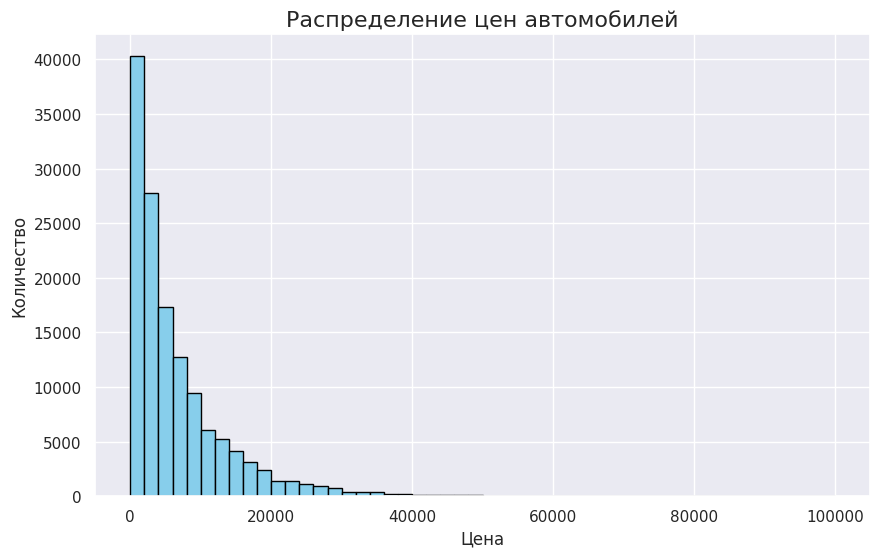

In [ ]:
# Строим гистограмму распределения цен
plt.figure(figsize=(10, 6))

# Гистограмма для столбца 'price'
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')

# Настроим заголовок и подписи
plt.title('Распределение цен автомобилей', fontsize=16)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

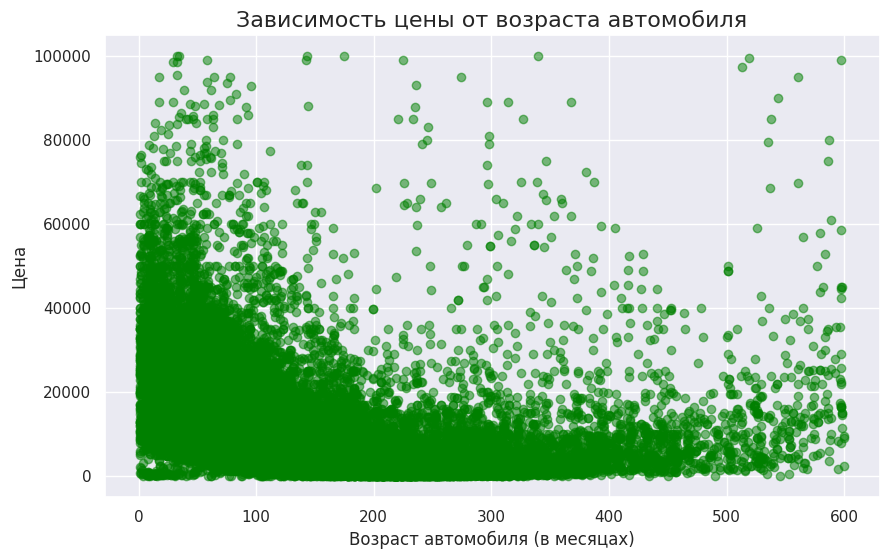

In [ ]:
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния (scatter plot)
plt.scatter(data['autoAgeMonths'], data['price'], alpha=0.5, color='green')

# Настройки графика
plt.title('Зависимость цены от возраста автомобиля', fontsize=16)
plt.xlabel('Возраст автомобиля (в месяцах)', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()

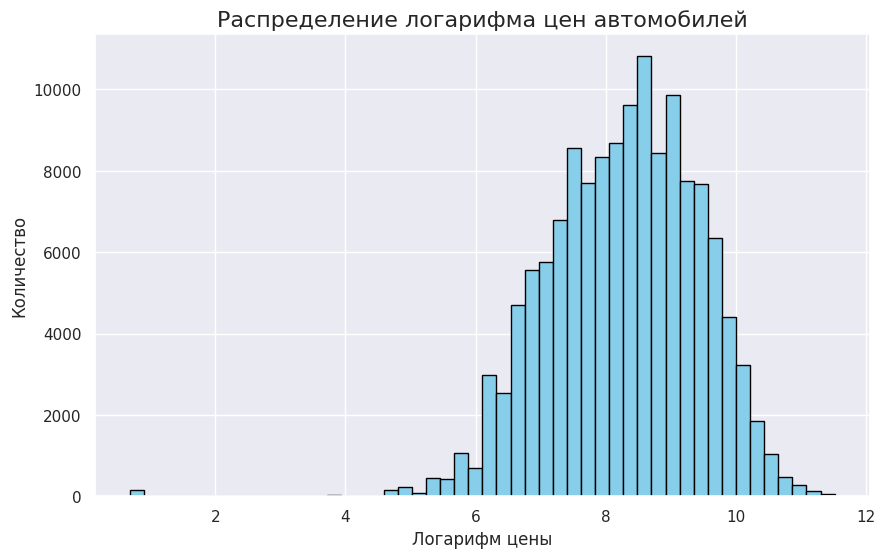

In [ ]:
# Применяем логарифм к столбцу 'price', добавляя небольшое смещение, чтобы избежать ошибки для 0
log_price = np.log(data['price'] + 1)  # добавляем 1, чтобы избежать log(0)

# Строим гистограмму распределения логарифмов цен
plt.figure(figsize=(10, 6))

# Гистограмма для логарифма цен
plt.hist(log_price, bins=50, color='skyblue', edgecolor='black')

# Настроим заголовок и подписи
plt.title('Распределение логарифма цен автомобилей', fontsize=16)
plt.xlabel('Логарифм цены', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

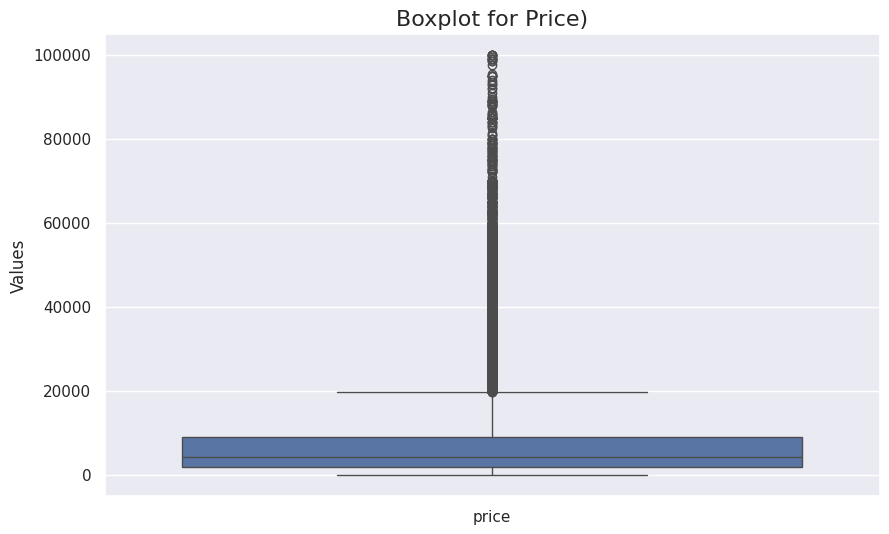

In [ ]:
# Рассчитаем логарифм от столбца 'price'
data['log_price'] = np.log(data['price'])

# Создадим фигуру и оси для графика
plt.figure(figsize=(10, 6))

# Построим boxplot для столбца 'price'
sns.boxplot(data=data[['price']])

# Подпишем оси
plt.title('Boxplot for Price)', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.show()

Видим странные значения около нулевых а также много выбросов с ценой более 20 тыс, удалим эти строки для дальнейшего исследования

In [ ]:

# Условие для выбросов: цены больше 20000 или меньше или равны 0
outliers_condition = (data['price'] > 20000) | (data['price'] <= 10)

# Подсчитываем количество выбросов
outliers_count = data[outliers_condition].shape[0]

# Выводим количество выбросов
print(f"Количество выбросов в столбце 'price': {outliers_count}")

# Удаляем выбросы
data = data[~outliers_condition]

# Проверяем результат
print(f"Размер данных после удаления выбросов: {data.shape}")


Количество выбросов в столбце 'price': 8475
Размер данных после удаления выбросов: (128530, 11)


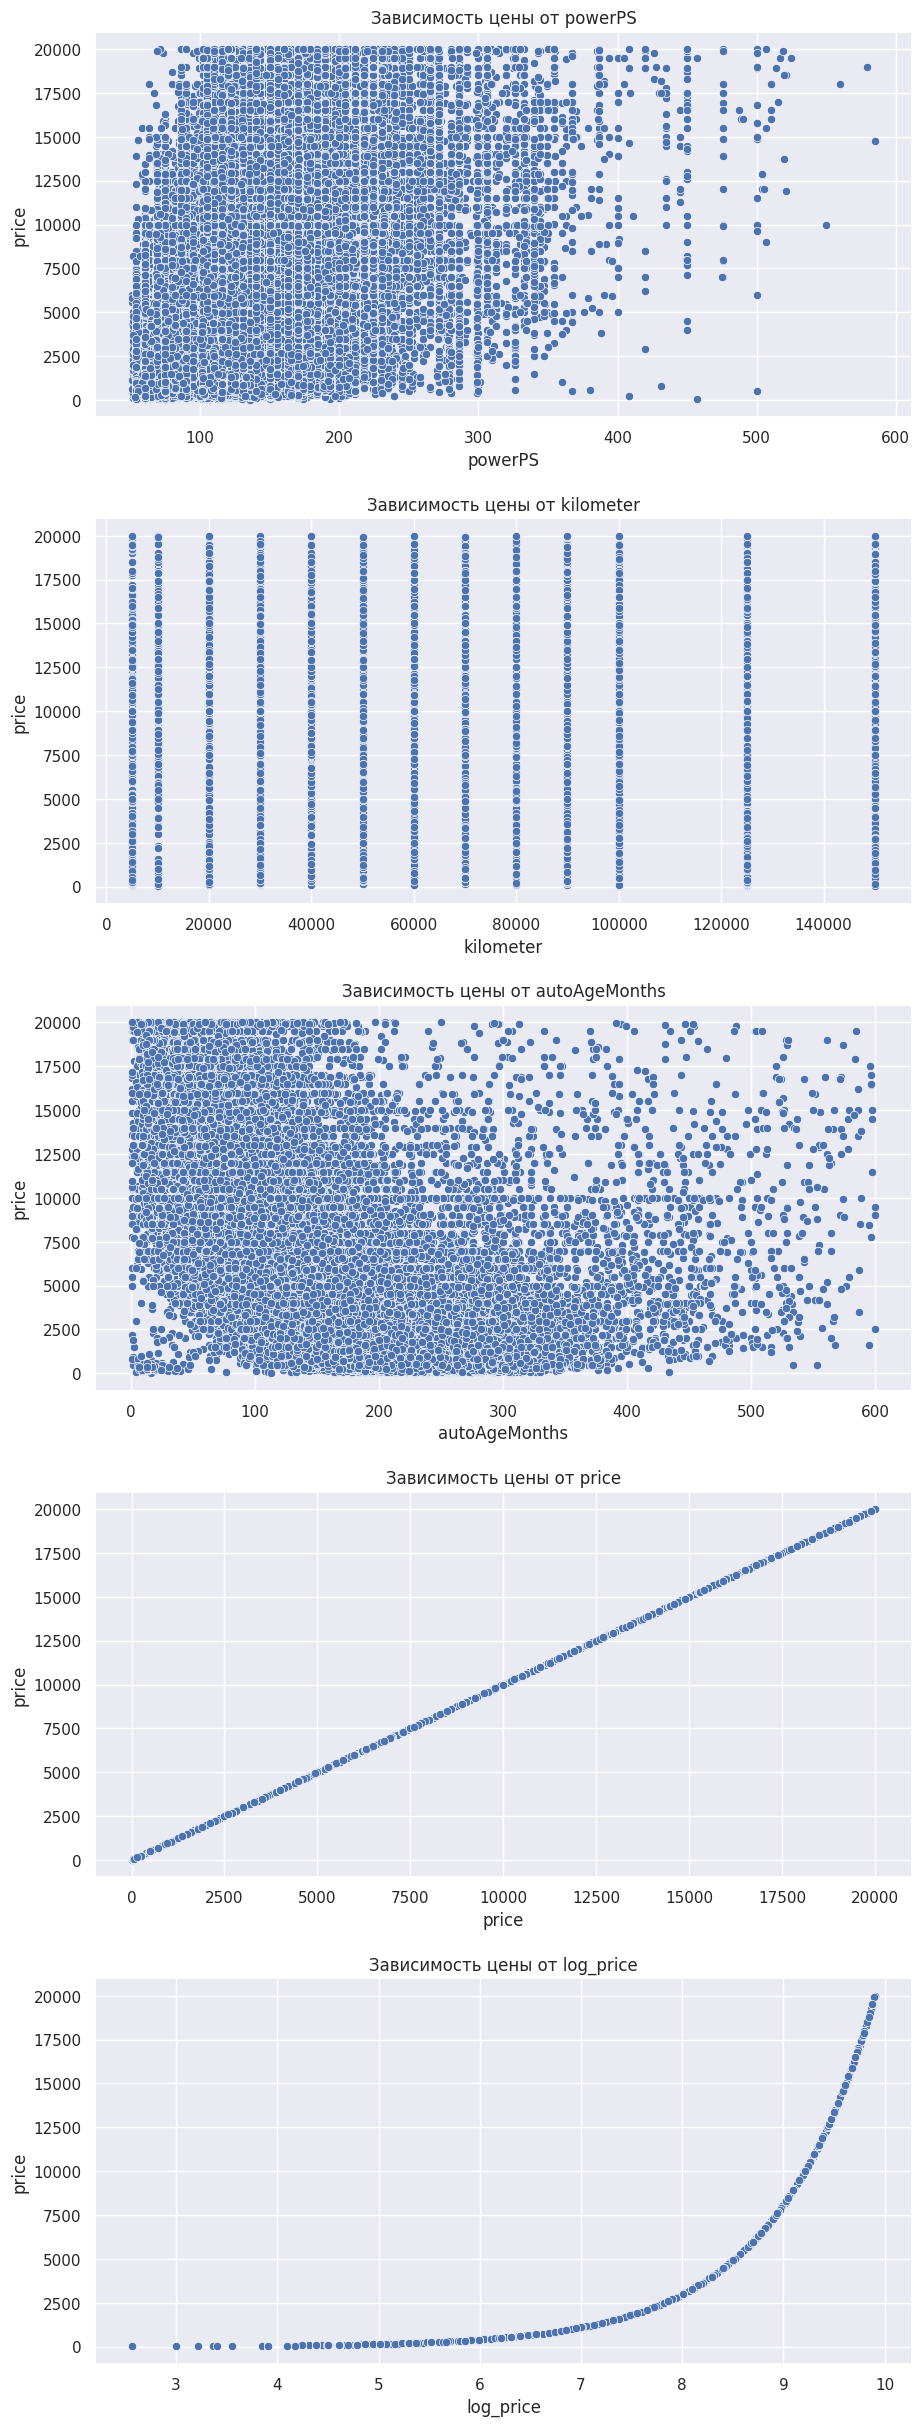

In [ ]:
categorical = []
numeric = []
other = []


# Для числовых признаков создадим scatter plot, а для категориальных - box plot
numeric = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.tolist()

# Создадим подграфики
fig, axes = plt.subplots(nrows=len(numeric), ncols=1, figsize=(10, 5 * (len(numeric))))
plt.tight_layout(pad=4.0)

# Графики для числовых признаков
for i, col in enumerate(numeric):
    ax = axes[i]
    sns.scatterplot(data=data, x=col, y='price', ax=ax)
    ax.set_title(f'Зависимость цены от {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('price')

plt.show()

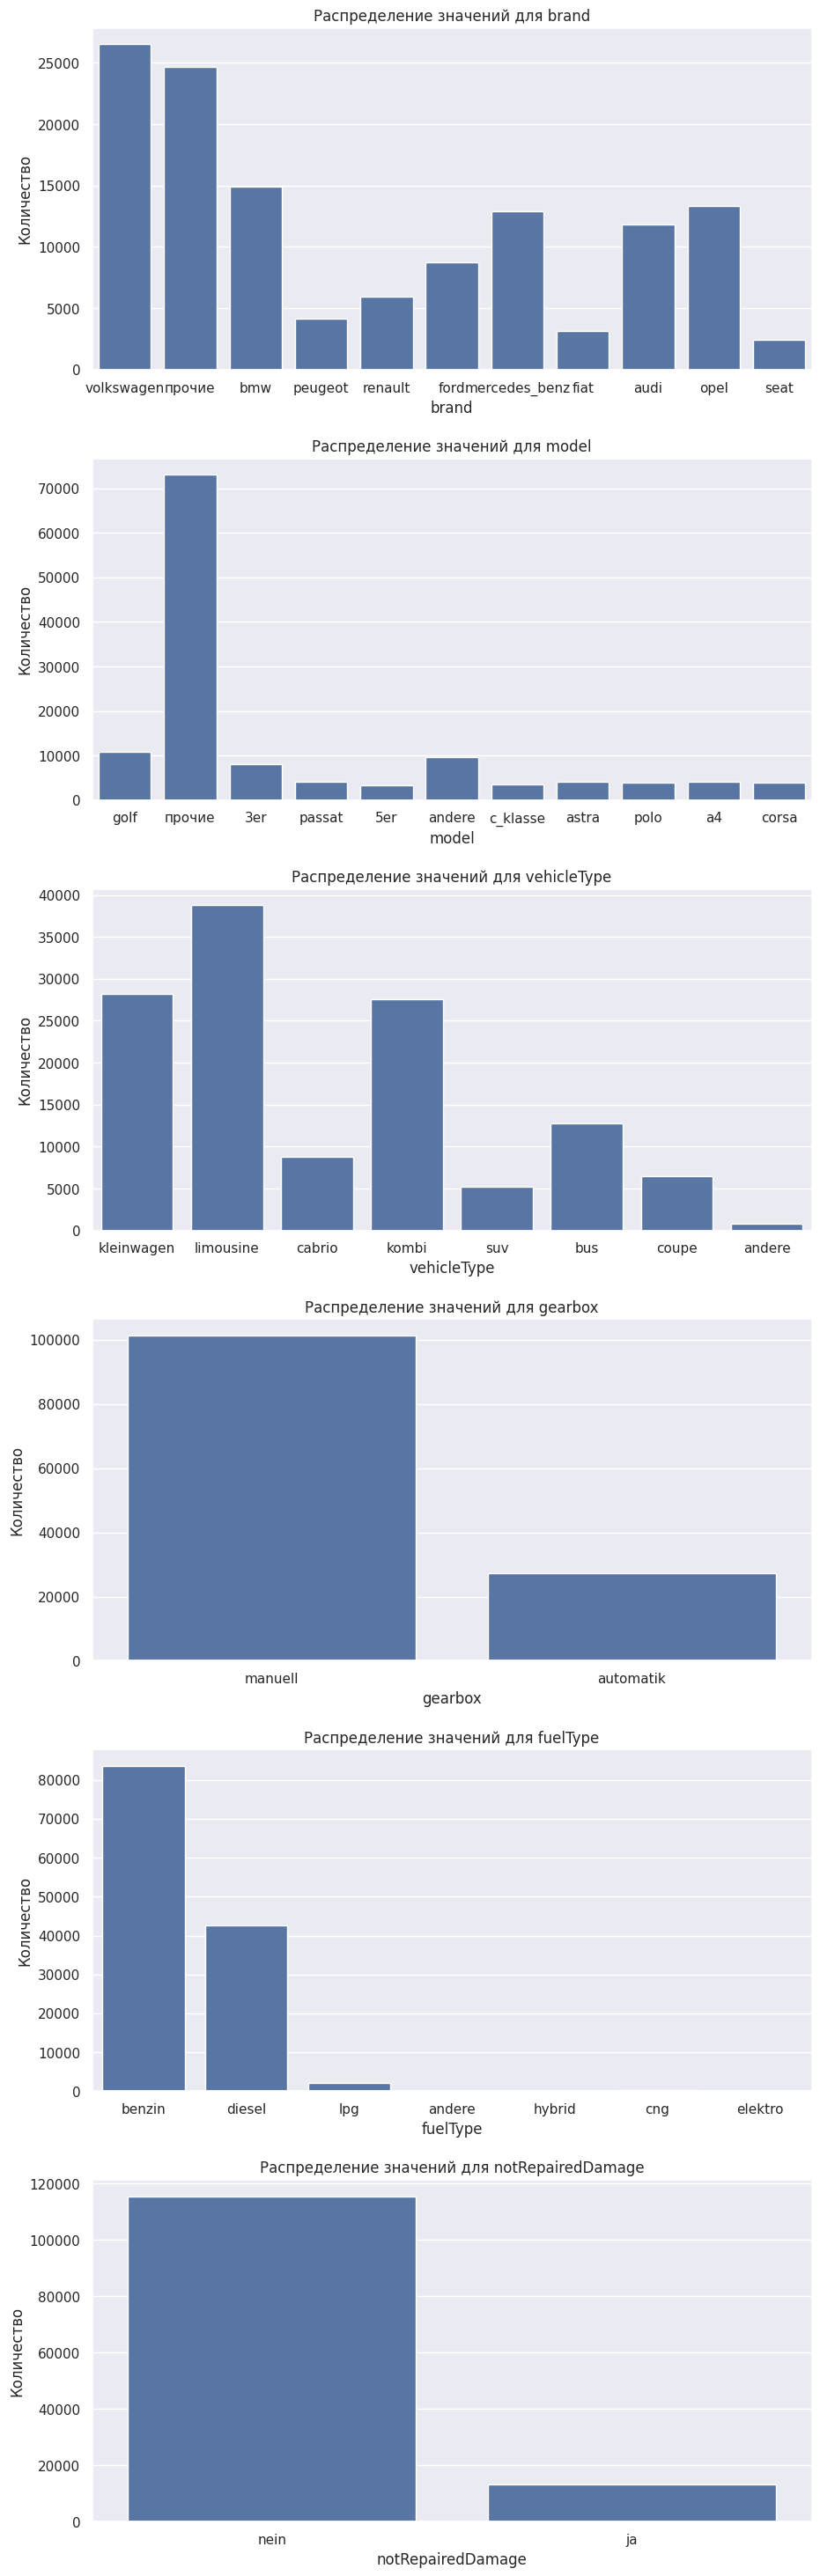

In [ ]:
# Функция для замены редких категорий на "прочие"
def top_categories(df, col, top_n=10):
    # Получаем топ N категорий по частоте
    top_vals = df[col].value_counts().nlargest(top_n).index
    # Заменяем все остальные значения на "прочие"
    df[col] = df[col].apply(lambda x: x if x in top_vals else 'прочие')
    return df

# Делаем то же самое для столбцов 'brand' и 'model'
data = top_categories(data, 'brand', top_n=10)
data = top_categories(data, 'model', top_n=10)

# Создадим подграфики
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']  # Пример категориальных признаков
fig, axes = plt.subplots(nrows=len(categorical), ncols=1, figsize=(10, 5 * len(categorical)))
plt.tight_layout(pad=4.0)

# Графики для категориальных признаков
for i, col in enumerate(categorical):
    ax = axes[i]
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Распределение значений для {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Количество')

plt.show()


In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

# Разделим данные на обучающую (80%) и временную (20%) выборку
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

# Разделим временную выборку на валидационную (50%) и тестовую (50%) выборки
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Проверим размеры выборок
print(f'Размер обучающей выборки: {x_train.shape[0]}')
print(f'Размер валидационной выборки: {x_val.shape[0]}')
print(f'Размер тестовой выборки: {x_test.shape[0]}')

Размер обучающей выборки: 102824
Размер валидационной выборки: 12853
Размер тестовой выборки: 12853


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [107]:
# Функция для проверки на NaN и inf и их замены
def check_and_fix_data(X):
    # Проверка на NaN
    if np.any(np.isnan(X)):
        print("Warning: NaN values found in the data. Replacing with zeros.")
        X = np.nan_to_num(X, nan=0.0)  # Заменяем NaN на 0

    # Проверка на inf
    if np.any(np.isinf(X)):
        print("Warning: Inf values found in the data. Replacing with zeros.")
        X = np.nan_to_num(X, posinf=0.0, neginf=0.0)  # Заменяем inf на 0

    # Переход к проверке на слишком большие значения
    max_value = np.max(np.abs(X))
    if max_value > 1e10:  # Если значение слишком большое, его ограничим
        print(f"Warning: Large values found in the data (max: {max_value}). Clipping values.")
        X = np.clip(X, -1e10, 1e10)  # Ограничиваем значения в пределах от -1e10 до 1e10

    return X

# Применяем эту функцию к данным
x_train = check_and_fix_data(x_train)
x_val = check_and_fix_data(x_val)
x_test = check_and_fix_data(x_test)
y_train = check_and_fix_data(y_train)
y_temp = check_and_fix_data(y_temp)
y_val = check_and_fix_data(y_val)
y_test = check_and_fix_data(y_test)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

# Логарифмическая сетка для lambda (например, от 1e-5 до 10)
lambda_range = np.logspace(-5, 1, num=20)
learning_rate_range = np.logspace(-6, -2, num=5)

# Функция для проверки наличия NaN или Inf в данных
def clean_data(X, y):
    # Создание маски для данных, где нет NaN и Inf
    valid_mask = np.isfinite(X).all(axis=1) & np.isfinite(y)

    # Применяем маску, чтобы исключить строки с ошибками
    return X[valid_mask], y[valid_mask]

# Функция для подбора оптимального значения lambda
def tune_lambda_for_method(method_class, x_train, y_train, x_val, y_val, lambda_range):
    best_lambda = None
    best_mse_val = float('inf')
    best_iterations = 0

    # Массив для хранения ошибок для каждого значения lambda
    lambda_errors = []

    # Перебор по значениям lambda
    for lambda_ in lambda_range:
        # Инициализация метода с данным lambda_
        method = method_class(dimension=x_train.shape[1], lambda_=lambda_)

        # Обучаем метод до сходимости
        method_errors = []
        for iteration in range(1000):  # Ограничиваем количество итераций (например, 1000)
            weight_diff = method.step(x_train, y_train)

            # Проверка на сходимость: если разница весов мала, то считаем, что мы сошлись
            if np.linalg.norm(weight_diff) < 1e-6:
                best_iterations = iteration + 1
                break

        # Оценка ошибки на валидационной выборке
        y_val_pred = method.predict(x_val)

        try:
            mse_val = mean_squared_error(y_val, y_val_pred)
        except ValueError:
            print("Error in calculating MSE on validation set. Skipping this lambda.")
            continue  # Пропускаем этот lambda, если ошибка

        lambda_errors.append(mse_val)

        # Если текущая ошибка на валидационной выборке меньше, обновляем лучший lambda_
        if mse_val < best_mse_val:
            best_mse_val = mse_val
            best_lambda = lambda_

    # Возвращаем лучший lambda, количество итераций и ошибки
    return best_lambda, best_iterations, lambda_errors

# Функция для оценки модели
def evaluate_model(method_class, x_train, y_train, x_test, y_test, best_lambda):
    # Создаем модель с наилучшим lambda
    method = method_class(dimension=x_train.shape[1], lambda_=best_lambda)

    # Обучаем модель на обучающих данных
    method.step(x_train, y_train)

    # Прогноз на обучающих данных
    y_train_pred = method.predict(x_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Прогноз на тестовых данных
    method.step(x_test, y_test)
    y_test_pred = method.predict(x_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Возвращаем метрики
    return mse_train, r2_train, mse_test, r2_test

# Пример использования с методами из файла descents.py
from descents import VanillaGradientDescent, StochasticDescent, MomentumDescent, Adam

# Разделим данные на обучающие, валидационные и тестовые выборки
X, y = np.random.rand(100, 10), np.random.rand(100)  # Пример случайных данных

# Сначала очистим данные от NaN и Inf
X, y = clean_data(X, y)

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Методы для подбора
methods = {
    'Vanilla Gradient Descent': VanillaGradientDescent,
    'Stochastic Descent': StochasticDescent,
    'Momentum Descent': MomentumDescent,
    'Adam': Adam
}

# Словарь для хранения результатов
results = {}

# Перебор методов и подбор оптимального lambda
for method_name, method_class in methods.items():
    print(f"Tuning lambda for {method_name}...")

    # Подбор lambda по валидационной выборке
    best_lambda, best_iterations, lambda_errors = tune_lambda_for_method(method_class, x_train, y_train, x_val, y_val, lambda_range)

    # Оценка модели с наилучшим lambda
    mse_train, r2_train, mse_test, r2_test = evaluate_model(method_class, x_train, y_train, x_test, y_test, best_lambda)

    # Сохранение результатов
    results[method_name] = {
        'best_lambda': best_lambda,
        'iterations_to_convergence': best_iterations,
        'lambda_errors': lambda_errors,
        'mse_train': mse_train,
        'r2_train': r2_train,
        'mse_test': mse_test,
        'r2_test': r2_test
    }

# Вывод результатов
for method_name, result in results.items():
    print(f"{method_name}:")
    print(f"  Best lambda: {result['best_lambda']}")
    print(f"  Iterations to convergence: {result['iterations_to_convergence']}")
    print(f"  Training MSE: {result['mse_train']}")
    print(f"  Training R2: {result['r2_train']}")
    print(f"  Test MSE: {result['mse_test']}")
    print(f"  Test R2: {result['r2_test']}")


Tuning lambda for Vanilla Gradient Descent...
Tuning lambda for Stochastic Descent...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Error in calculating MSE on validation set. Skipping this lambda.
Error in calculating MSE on validation set. Skipping this lambda.
Error in calculating MSE on validation set. Skipping this lambda.


ValueError: Cannot take a larger sample than population when 'replace=False'

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

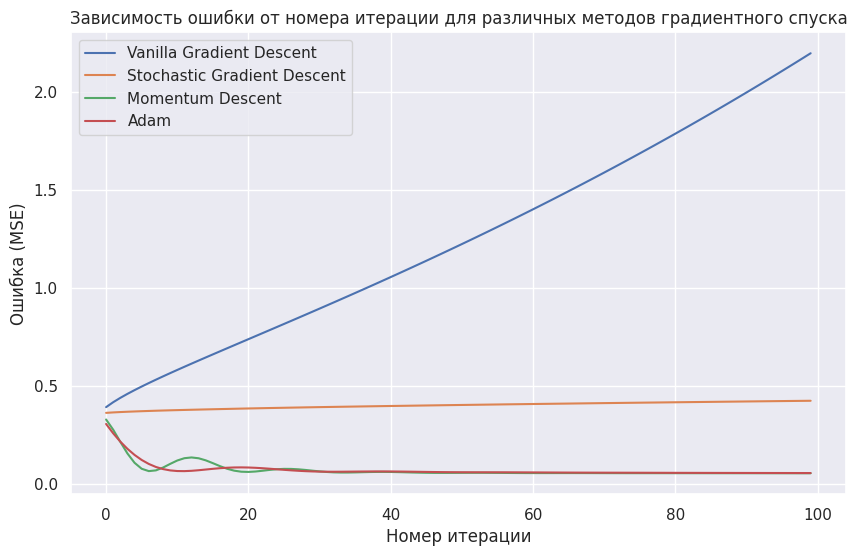

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Инициализация всех методов градиентного спуска
methods = {
    'Vanilla Gradient Descent': VanillaGradientDescent(dimension=x_train.shape[1]),
    'Stochastic Gradient Descent': StochasticDescent(dimension=x_train.shape[1]),
    'Momentum Descent': MomentumDescent(dimension=x_train.shape[1]),
    'Adam': Adam(dimension=x_train.shape[1])
}

# Словарь для хранения ошибок на каждой итерации
errors = {method_name: [] for method_name in methods.keys()}

# Количество итераций
n_iterations = 100

# Пройдем по каждому методу и обучим его
for method_name, method in methods.items():
    method_errors = []
    for i in range(n_iterations):
        # Сделаем шаг градиентного спуска
        method.step(x_train, y_train)

        # Вычисляем ошибку (например, MSE)
        y_pred = method.predict(x_train)
        error = mean_squared_error(y_train, y_pred)  # То же самое для y_train
        method_errors.append(error)

    errors[method_name] = method_errors

# Построение графика
plt.figure(figsize=(10, 6))
for method_name, method_errors in errors.items():
    plt.plot(range(n_iterations), method_errors, label=method_name)

plt.xlabel('Номер итерации')
plt.ylabel('Ошибка (MSE)')
plt.title('Зависимость ошибки от номера итерации для различных методов градиентного спуска')
plt.legend()
plt.grid(True)
plt.show()

`### Судя по графикам, хуже всего справляется с задачей Vanilla, а лучше всего - Adam, при это отличия Adam от Momentum минимальные, наблюдаются только для небольшого количества итераций ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

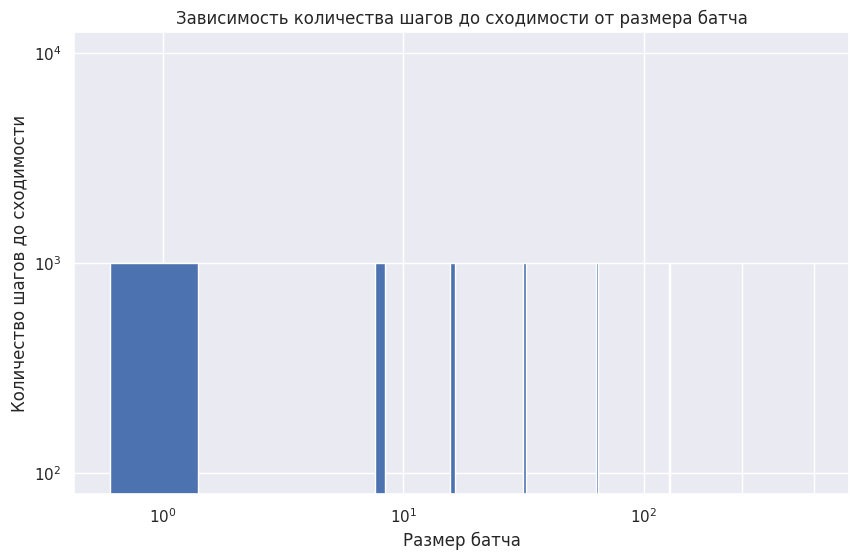

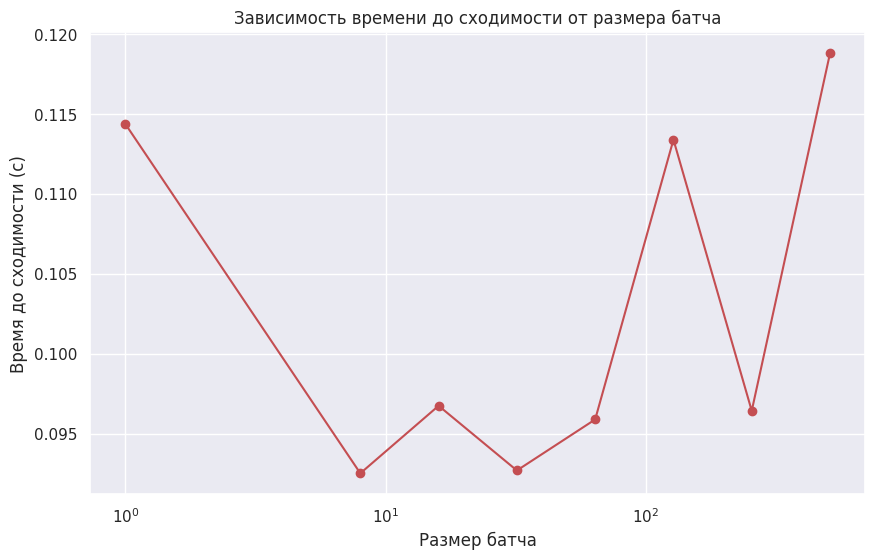

In [118]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
import time

# Пример класса StochasticDescent (чтобы код работал)
class StochasticDescent:
    def __init__(self, dimension, batch_size):
        self.dimension = dimension
        self.batch_size = batch_size
        self.learning_rate = 0.01  # Параметр для скорости обучения

    def step(self, X, y):
        # Это упрощенная версия, шаг обновления весов
        gradient = np.dot(X.T, (np.dot(X, self.weights) - y)) / X.shape[0]
        weight_diff = -self.learning_rate * gradient
        self.weights -= weight_diff
        return weight_diff

# Функция для выполнения эксперимента с разными размерами батча
def run_sgd_experiment(x_train, y_train, batch_sizes, k=10, max_iterations=1000, convergence_threshold=1e-6):
    results = {}

    for batch_size in batch_sizes:
        iteration_counts = []
        times = []

        for _ in range(k):  # k запусков для каждого размера батча
            # Инициализация модели
            method = StochasticDescent(dimension=x_train.shape[1], batch_size=batch_size)

            # Инициализация весов (если они не инициализированы в классе)
            if not hasattr(method, 'weights'):
                method.weights = np.zeros(x_train.shape[1])

            start_time = time.time()
            iterations = 0

            for iteration in range(max_iterations):
                weight_diff = method.step(x_train, y_train)  # Выполняем шаг SGD
                iterations += 1

                # Проверка на сходимость
                if np.linalg.norm(weight_diff) < convergence_threshold:
                    break

            # Замер времени
            elapsed_time = time.time() - start_time

            # Записываем результаты
            iteration_counts.append(iterations)
            times.append(elapsed_time)

        # Средние значения по всем k запускам
        results[batch_size] = {
            'mean_iterations': np.mean(iteration_counts),
            'mean_time': np.mean(times)
        }

    return results

# Генерация случайных данных для примера
x_train = np.random.rand(1000, 20)  # 1000 примеров, 20 признаков
y_train = np.random.rand(1000)  # 1000 целевых значений

# Размеры батчей для эксперимента
batch_sizes = [1, 8, 16, 32, 64, 128, 256, 512]

# Выполняем эксперимент
results = run_sgd_experiment(x_train, y_train, batch_sizes, k=10)

# Строим графики

# 1. Столбчатая диаграмма зависимости количества шагов до сходимости от размера батча
batch_sizes_sorted = sorted(batch_sizes)
iterations = [results[batch_size]['mean_iterations'] for batch_size in batch_sizes_sorted]

# Фильтрация данных: убираем слишком большие значения для корректной визуализации
max_iterations_to_display = 1000
filtered_batch_sizes = []
filtered_iterations = []

for i, batch_size in enumerate(batch_sizes_sorted):
    if iterations[i] <= max_iterations_to_display:
        filtered_batch_sizes.append(batch_size)
        filtered_iterations.append(iterations[i])

plt.figure(figsize=(10, 6))
plt.bar(filtered_batch_sizes, filtered_iterations, color='b')
plt.xscale('log')  # Логарифмическая шкала для оси X
plt.yscale('log')  # Логарифмическая шкала для оси Y
plt.xlabel('Размер батча')
plt.ylabel('Количество шагов до сходимости')
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.grid(True)
plt.show()

# 2. График зависимости времени до сходимости от размера батча (по-прежнему линейный график)
times = [results[batch_size]['mean_time'] for batch_size in batch_sizes_sorted]

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes_sorted, times, marker='o', linestyle='-', color='r')
plt.xscale('log')
plt.xlabel('Размер батча')
plt.ylabel('Время до сходимости (с)')
plt.title('Зависимость времени до сходимости от размера батча')
plt.grid(True)
plt.show()


`### Мы можем сделать вывод, что оптимальный размер батча находится в диапазоне от 10 до 10^2 - для этих значений требуется не так много времени для сходимости и относительно немного шагов ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: